# Traffic Sign Classifier

In [ ]:
## Download the data
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

data_dir = 'traffic-signs-data/'
# Make sure vgg exists
if not isdir(data_dir):
    raise Exception("traffic-signs-data directory doesn't exist!")

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(data_dir):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Project Dataset') as pbar:
        urlretrieve(
            url,
            data_dir,
            pbar.hook)
else:
    print("Data file already exists!")
    


In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:3]
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset
Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

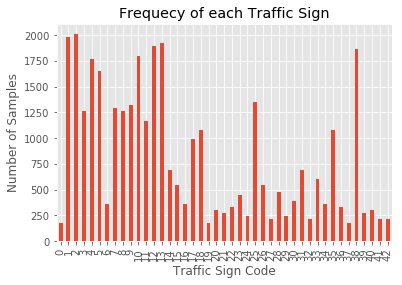

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.style.use('ggplot')

labels = pd.DataFrame(y_train)

ax = labels[0].value_counts().sort_index().plot.bar(title='Frequecy of each Traffic Sign')
ax.set_xlabel("Traffic Sign Code")
ax.set_ylabel("Number of Samples")

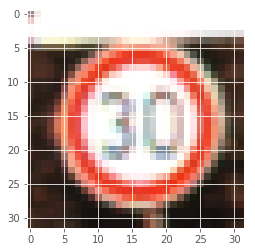

In [4]:
# Take a look at some of the images
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline
imshow(X_train[3000])


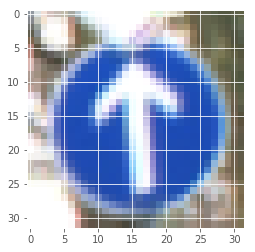

In [5]:
imshow(X_train[20000])


There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_test)
# X_test_n = scaler.transform(X_test)
# np.mean(X_test_n)

def scale(x, feature_range=(-1, 1)):
    # scale to (0, 1)
    x = ((x - x.min())/(255 - x.min()))

    # scale to feature_range
    min, max = feature_range
    x = x * (max - min) + min
    return x

X_train = scale(X_train)
X_test = scale(X_test)
X_valid = scale(X_valid)


In [7]:
from sklearn.utils import shuffle
# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [22]:
import tensorflow as tf

# Ideas
# More layers 
# more epochs
# wider layers
# batch norming?
# learning rate optimisation
# Put this up on amazon

EPOCHS = 10
BATCH_SIZE = 128
keep_prob = 0.8
num_classes = 43

In [28]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.layers.dropout(conv1, rate=keep_prob)
    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.layers.dropout(conv2, rate=keep_prob)
    
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.layers.dropout(fc1, rate=keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.layers.dropout(fc2, rate=keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, num_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(num_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [42]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, num_classes)

In [43]:
# Setup the Ops
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [44]:
# Setup the Evalution Metrics 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [47]:
# Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.760

EPOCH 2 ...
Validation Accuracy = 0.872

EPOCH 3 ...
Validation Accuracy = 0.870

EPOCH 4 ...
Validation Accuracy = 0.875

EPOCH 5 ...
Validation Accuracy = 0.903

EPOCH 6 ...
Validation Accuracy = 0.899

EPOCH 7 ...
Validation Accuracy = 0.901

EPOCH 8 ...
Validation Accuracy = 0.894

EPOCH 9 ...
Validation Accuracy = 0.892

EPOCH 10 ...
Validation Accuracy = 0.897

Model saved


In [48]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.907


# VGG16 NETWORK

In [8]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm

vgg_dir = 'tensorflow_vgg/'
# Make sure vgg exists
if not isdir(vgg_dir):
    raise Exception("VGG directory doesn't exist!")

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(vgg_dir + "vgg16.npy"):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='VGG16 Parameters') as pbar:
        urlretrieve(
            'https://s3.amazonaws.com/content.udacity-data.com/nd101/vgg16.npy',
            vgg_dir + 'vgg16.npy',
            pbar.hook)
else:
    print("Parameter file already exists!")

Parameter file already exists!


In [9]:
import os

import tensorflow as tf

from tensorflow_vgg import vgg16
from tensorflow_vgg import utils

### Upsample all images to 224x224 -> put through network

In [10]:
# from skimage import util
# img = util.numpy_pad(X_valid[0], pad_width=96, mode='constant', constant_values = 0)
# img.shape
#batch.append(img.reshape((1, 224, 224, 3)))
#batch[0].shape

import scipy as sp
new_X_train = []
## Upsample X training/Test/Valid data
for x in X_train[0:51]:
    new_X_train.append( sp.misc.imresize(x, size=(224,224) , interp='nearest') )

new_y_train = y_train[0:51]

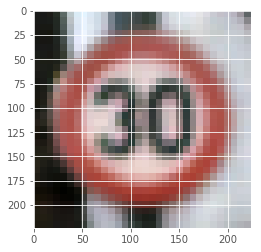

In [11]:
# Upscaled
new_X_train[0].shape
imshow(new_X_train[0])

In [12]:
###
###   PUSH IMAGES THROUGH VGG16
###
from skimage import util

# Set the batch size higher if you can fit in in your GPU memory
batch_size = 10
codes_list = []
labels = []
batch = []
vgg_x_size, vgg_y_size = 224, 224

codes = None

with tf.Session() as sess:
    
    vgg = vgg16.Vgg16()
    input_ =  tf.placeholder(tf.float32, [None, vgg_x_size, vgg_y_size, 3])
    with tf.name_scope("content_vgg"):
        vgg.build(input_)

    for ii in range(0, len(new_X_train)):
        # Add images to the current batch
        # utils.load_image crops the input images for us, from the center
        img = new_X_train[ii]
        batch.append(img.reshape((1, vgg_x_size, vgg_y_size, 3)))
        
        # Running the batch through the network to get the codes
        if ii % batch_size == 0 or ii == len(new_X_train)-1:

            # Image batch to pass to VGG network
            images = np.concatenate(batch)

            # Make a feed dict to inject the images for each batch
            feed_dict = {input_: images}
            codes_batch = sess.run(vgg.relu6, feed_dict=feed_dict)                

            # Here I'm building an array of the codes
            if codes is None:
                codes = codes_batch
            else:
                codes = np.concatenate((codes, codes_batch))

            # Reset to start building the next batch
            batch = []
            print('{} images processed'.format(ii))

            
            
# write codes to file
with open('codes', 'w') as f:
    codes.tofile(f)
    
# write labels to file
import csv
with open('labels', 'w') as f:
    writer = csv.writer(f, delimiter='\n')
    writer.writerow(labels)

print("Codes Saved to File")

print('Done')

/Users/andrew/Documents/udacity/car1/CarND-Traffic-Sign-Classifier-Project/tensorflow_vgg/vgg16.npy
npy file loaded
build model started
build model finished: 0s
0 images processed
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
Done


In [14]:
# read codes and labels from file
import csv

with open('labels') as f:
    reader = csv.reader(f, delimiter='\n')
    labels = np.array([each for each in reader if len(each) > 0]).squeeze()
with open('codes') as f:
    codes = np.fromfile(f, dtype=np.float32)
    codes = codes.reshape((len(new_X_train), -1))

print("done")

done


In [18]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
label_binarizer.fit( y_train ) #range(n_classes))

labels_vecs = label_binarizer.transform(np.array(new_y_train)) #  one-hot encoded labels array here

print("Lenght X_Train = ",len(new_X_train))
print("Lenght labels_vecs = ",len(labels_vecs))
print('Done')

Lenght X_Train =  51
Lenght labels_vecs =  51
Done


In [19]:
# Split into training validation and test

from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into train=80%, test=10% and valid=10%
ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
splitter = ss.split(codes, labels_vecs)

for train_index, temp_index in splitter:
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_x, train_y  = codes[train_index], labels_vecs[train_index]
    temp_x, temp_y  = codes[temp_index], labels_vecs[temp_index]

# Again for test and valid set, this time 50-50
ss = StratifiedShuffleSplit(n_splits=1, test_size=0.5)
splitter = ss.split(temp_x, temp_y)

for test_index, valid_index in splitter:
    #print("TRAIN:", train_index, "TEST:", test_index)
    test_x, test_y  = temp_x[test_index], temp_y[test_index]
    val_x, val_y    = temp_x[valid_index], temp_y[valid_index]
    
print('Done')


Done


In [20]:
print("Train shapes (x, y):", train_x.shape, train_y.shape)
print("Validation shapes (x, y):", val_x.shape, val_y.shape)
print("Test shapes (x, y):", test_x.shape, test_y.shape)

Train shapes (x, y): (40, 4096) (40, 43)
Validation shapes (x, y): (6, 4096) (6, 43)
Test shapes (x, y): (5, 4096) (5, 43)


In [21]:
## BUILD A FULLY CONNECTED CLASSIFIER
def fully_conn(x_tensor, num_outputs):
    net = tf.layers.dense(x_tensor, num_outputs) 
    return(tf.nn.relu(net))

def output(x_tensor, num_outputs):
    net = tf.layers.dense(x_tensor, num_outputs, activation = None)
    return( net )

def dnn(x, keep_prob):
    # Fully Connected
    net = fully_conn(x, 300)  # reduced this to make prediction faster
    net = fully_conn(net, 200)
    net = fully_conn(net, 100)
    
    # Dropout
    net = tf.layers.dropout(net, rate=keep_prob)
        
    # Output Layer (43 classes of signs)
    net = output(net, n_classes)

    return net

print("Model Built")

Model Built


### Build the Model

In [22]:
# Init Inputs to model
inputs_ = tf.placeholder(tf.float32, shape=[None, codes.shape[1]])
labels_ = tf.placeholder(tf.int64, shape=[None, labels_vecs.shape[1]])
keep_prob_ = tf.placeholder(tf.float32, name="keep_prob" )
keep = 0.5

# Classifier layers and operations
logits = dnn(inputs_, keep) # output layer logits
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_))# cross entropy loss

optimizer = tf.train.AdamOptimizer().minimize(cost) # training optimizer

# Operations for validation/test accuracy
predicted = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(predicted, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("Network Built")

Network Built


In [23]:
def print_stats(session, valid_features, valid_labels, cost, accuracy):
    """
    Print information about loss and validation accuracy
    """
    loss = round( sess.run(cost, feed_dict={inputs_: valid_features, labels_: valid_labels }), 3)
    acc = round( sess.run(accuracy, feed_dict={ inputs_: valid_features, labels_: valid_labels }), 3)
                
    print('Loss = {}'.format(loss), 'Validation Accuracy = {}'.format(acc))

print("Done")

Done


In [24]:
def get_batches(x, y, n_batches=10):
    """ Return a generator that yields batches from arrays x and y. """
    batch_size = len(x)//n_batches
    
    for ii in range(0, n_batches*batch_size, batch_size):
        # If we're not on the last batch, grab data with size batch_size
        if ii != (n_batches-1)*batch_size:
            X, Y = x[ii: ii+batch_size], y[ii: ii+batch_size] 
        # On the last batch, grab the rest of the data
        else:
            X, Y = x[ii:], y[ii:]
        # I love generators
        yield X, Y

print("Generator Made")

Generator Made


In [25]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):

    session.run(optimizer, feed_dict={inputs_: feature_batch, labels_: label_batch}) 

print("Ready")

Ready


In [27]:
saver = tf.train.Saver()

epochs = 10
n_batches = 3
keep_probability = 0.5

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        batch_i = 1
        # Get batches from training data
        for batch_features, batch_labels in get_batches(train_x, train_y, n_batches):
            # Run the network
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            if(batch_i%3==0):
                print('Epoch {:>2}, Model Batch {}:  '.format(epoch + 1, batch_i), end='')
                print_stats(sess, val_x, val_y, cost, accuracy)
            batch_i += 1
    
    saver.save(sess, "checkpoints/traffic_signs.ckpt")

print("Model Training Complete.")

Training...
Epoch  1, Model Batch 3:  Loss = 1961.73095703125 Validation Accuracy = 0.0
Epoch  2, Model Batch 3:  Loss = 1489.4329833984375 Validation Accuracy = 0.0
Epoch  3, Model Batch 3:  Loss = 1418.262939453125 Validation Accuracy = 0.16699999570846558
Epoch  4, Model Batch 3:  Loss = 1943.7060546875 Validation Accuracy = 0.16699999570846558
Epoch  5, Model Batch 3:  Loss = 2861.47998046875 Validation Accuracy = 0.0
Epoch  6, Model Batch 3:  Loss = 3525.595947265625 Validation Accuracy = 0.0
Epoch  7, Model Batch 3:  Loss = 3914.949951171875 Validation Accuracy = 0.16699999570846558
Epoch  8, Model Batch 3:  Loss = 4059.9599609375 Validation Accuracy = 0.16699999570846558
Epoch  9, Model Batch 3:  Loss = 4192.6328125 Validation Accuracy = 0.16699999570846558
Epoch 10, Model Batch 3:  Loss = 4324.3837890625 Validation Accuracy = 0.16699999570846558
Model Training Complete.


### Testing

In [28]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: test_x,
            labels_: test_y}
    test_acc = sess.run(accuracy, feed_dict=feed)
    print("Test accuracy: {:.4f}".format(test_acc))

Test accuracy: 0.6000


In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.ndimage import imread

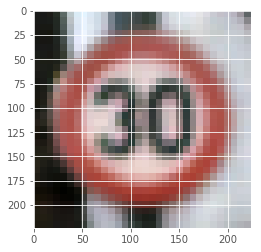

In [31]:
# We're going to try and classify a test image
#test_img_path = 'test-image.jpg'
#test_img = imread(test_img_path)
plt.imshow(new_X_train[0])

In [ ]:
# Run this cell if you don't have a vgg graph built
if 'vgg' in globals():
    print('"vgg" object already exists.  Will not create again.')
else:
    #create vgg
    with tf.Session() as sess:
        input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
        vgg = vgg16.Vgg16()
        vgg.build(input_)

In [34]:
# VGG takes 10sec to Create Vector
def intoVGG(img_array):
    with tf.Session() as sess:
        img = img_array
        img = img.reshape((1, 224, 224, 3))
        
        feed_dict = {input_: img}
        code = sess.run(vgg.relu6, feed_dict=feed_dict)

    print(">>> IMG pushed through VGG Model")
    return code
    
code = intoVGG(new_X_train[0])

# Loading Model and Pushing through takes 7sec
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    print(">>> Model Loaded")
    # Loading the model into memory takes a long time, can it stay in memory??
    
    feed = {inputs_: code}
    prediction = sess.run(predicted, feed_dict=feed).squeeze()

print(">>> Prediction Complete.")
print("")
print(prediction)
print("")

# classes = [each for each in contents if os.path.isdir(data_dir + each)]

# #classes.reverse()
n_classes = 43 #len(classes)

plt.barh(np.arange(n_classes), prediction)
_ = plt.yticks(np.arange(n_classes), classes) #lb.classes_)


>>> IMG pushed through VGG Model
>>> Model Loaded
>>> Prediction Complete.

[  0.00000000e+00   1.11275306e-03   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   9.98887241e-01
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.19122609e-25   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]



### PLOT CONFIDENCE IN ROAD SIGN

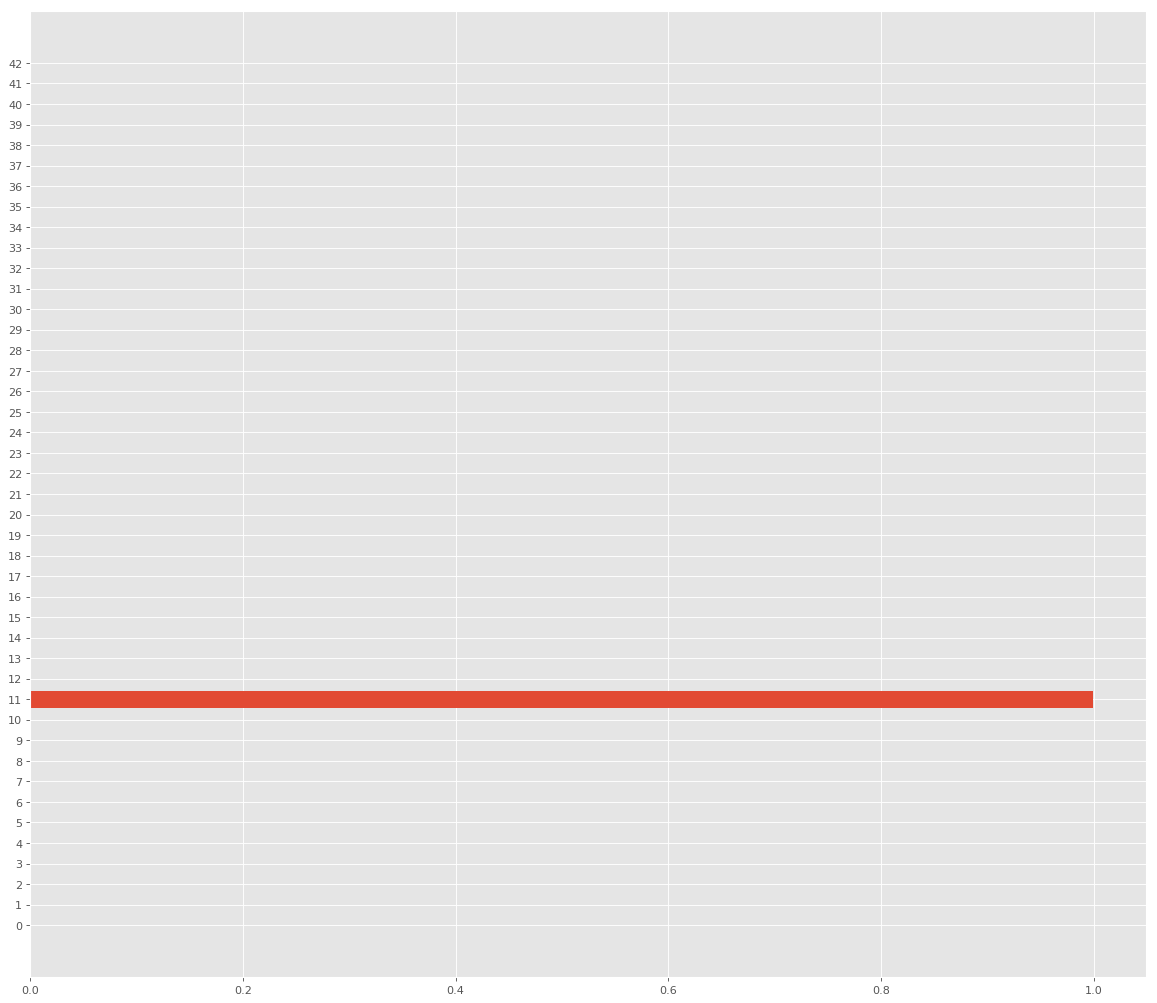

In [37]:
n_classes = 43 #len(classes)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.barh(np.arange(n_classes), prediction)
_ = plt.yticks(np.arange(n_classes), range(0,43)) #lb.classes_)



# NOW LOOK AT THE ORIGINAL CODE FOR WHATS NEXT?